data_train: (60000, 28, 28)
data_test: (10000, 28, 28)
target number:  6
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
Shirt


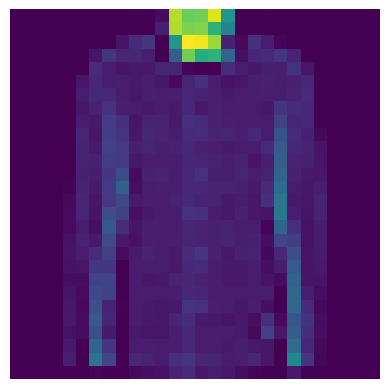

In [15]:
import keras
from keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
%matplotlib inline

(data_train, target_train), (data_test, target_test) = fashion_mnist.load_data()
print('data_train:', data_train.shape)
print('data_test:', data_test.shape)


plt.imshow(data_train[33])
plt.axis('off')
print('target number: ', target_train[33])


num_classes = 10
target_check = target_train
target_train = keras.utils.to_categorical(target_train, num_classes)
target_test = keras.utils.to_categorical(target_test, num_classes)
print(target_train[33])

data_train = data_train.astype('float32')
data_test = data_test.astype('float32')

#normalize data
data_train /= 255
data_test /= 255

# 0 T-shirt/top
# 1 Trouser
# 2 Pullover
# 3 Dress
# 4 Coat
# 5 Sandal
# 6 Shirt
# 7 Sneaker
# 8 Bag
# 9 Ankle boot
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal',      'Shirt',   'Sneaker',  'Bag',   'Ankle boot']
print(class_names[target_check[33]])

Epoch 1/100
118/118 [==============================] - 26s 211ms/step - loss: 1.9674 - accuracy: 0.2542 - val_loss: 1.0252 - val_accuracy: 0.5936
Epoch 2/100
118/118 [==============================] - 23s 194ms/step - loss: 1.0459 - accuracy: 0.5898 - val_loss: 0.8109 - val_accuracy: 0.6972
Epoch 3/100
118/118 [==============================] - 24s 202ms/step - loss: 0.8736 - accuracy: 0.6635 - val_loss: 0.7327 - val_accuracy: 0.7077
Epoch 4/100
118/118 [==============================] - 26s 217ms/step - loss: 0.7684 - accuracy: 0.7083 - val_loss: 0.6565 - val_accuracy: 0.7385
Epoch 5/100
118/118 [==============================] - 24s 206ms/step - loss: 0.7014 - accuracy: 0.7361 - val_loss: 0.5996 - val_accuracy: 0.7676
Epoch 6/100
118/118 [==============================] - 25s 212ms/step - loss: 0.6465 - accuracy: 0.7575 - val_loss: 0.5674 - val_accuracy: 0.7834
Epoch 7/100
118/118 [==============================] - 25s 209ms/step - loss: 0.6064 - accuracy: 0.7726 - val_loss: 0.5264 -

Epoch 57/100
118/118 [==============================] - 26s 219ms/step - loss: 0.2685 - accuracy: 0.9033 - val_loss: 0.2773 - val_accuracy: 0.8978
Epoch 58/100
118/118 [==============================] - 25s 215ms/step - loss: 0.2606 - accuracy: 0.9048 - val_loss: 0.2691 - val_accuracy: 0.9004
Epoch 59/100
118/118 [==============================] - 24s 205ms/step - loss: 0.2600 - accuracy: 0.9045 - val_loss: 0.2620 - val_accuracy: 0.9015
Epoch 60/100
118/118 [==============================] - 25s 213ms/step - loss: 0.2585 - accuracy: 0.9068 - val_loss: 0.2839 - val_accuracy: 0.8929
Epoch 61/100
118/118 [==============================] - 24s 202ms/step - loss: 0.2553 - accuracy: 0.9068 - val_loss: 0.2707 - val_accuracy: 0.9009
Epoch 62/100
118/118 [==============================] - 24s 200ms/step - loss: 0.2555 - accuracy: 0.9076 - val_loss: 0.2782 - val_accuracy: 0.8989
Epoch 63/100
118/118 [==============================] - 24s 201ms/step - loss: 0.2538 - accuracy: 0.9078 - val_loss: 0

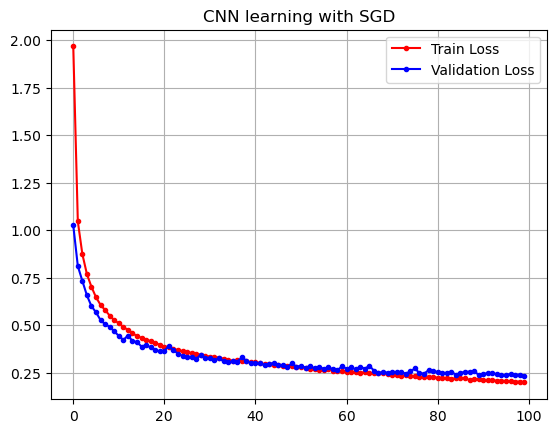

In [22]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import SGD
#import visualkeras

#initialize Sequential neural network
convNN = Sequential()
# 5x5 convolution with 2x2 stride and 32 filters
convNN.add(Conv2D(32, (3, 3), strides = (1, 1), padding='same', \
                  input_shape=(28, 28, 1), \
                  activation='relu'))

convNN.add(MaxPooling2D(pool_size=(2, 2)))

convNN.add(Conv2D(64, (3, 3), padding='same', activation='relu'))

convNN.add(MaxPooling2D(pool_size=(2, 2)))

convNN.add(Dropout(0.25))

convNN.add(Conv2D(128, (3, 3), padding='same', activation='relu'))

convNN.add(MaxPooling2D(pool_size=(2, 2)))

convNN.add(Conv2D(128, (3, 3), padding='same', activation='relu'))

convNN.add(MaxPooling2D(pool_size=(2, 2)))

convNN.add(Dropout(0.5))

convNN.add(Flatten())

convNN.add(Dense(512, activation='relu'))

convNN.add(Dropout(0.25))

convNN.add(Dense(num_classes, activation='softmax'))

#visualkeras.layered_view(convNN)

batch_size = 512
epochs = 100


convNN.compile(SGD(lr = .01, momentum=0.9), loss='categorical_crossentropy', metrics=['accuracy'])

run_hist_sgd_minist = convNN.fit(data_train, target_train, batch_size=batch_size, epochs=epochs,
                          validation_data=(data_test, target_test), shuffle=True, 
                          verbose=1)



plt.plot(run_hist_sgd_minist.history["loss"], 'r', marker='.', label="Train Loss")
plt.plot(run_hist_sgd_minist.history["val_loss"], 'b', marker='.', label="Validation Loss")
plt.title("CNN learning with SGD")
plt.legend()
plt.grid()


#model accuracy
scores = convNN.evaluate(data_test, target_test, verbose=True)
print('Test accuracy:', scores[1])

In [23]:
convNN.save('convolution_neural_network1.h5')

In [25]:
convNN = Sequential()
# 5x5 convolution with 2x2 stride and 32 filters
convNN.add(Conv2D(32, (3, 3), strides = (1, 1), padding='same', \
                  input_shape=(28, 28, 1), \
                  activation='relu'))

convNN.add(MaxPooling2D(pool_size=(2, 2)))

convNN.add(Conv2D(64, (3, 3), padding='same', activation='relu'))

convNN.add(MaxPooling2D(pool_size=(2, 2)))

convNN.add(Dropout(0.25))

convNN.add(Conv2D(128, (3, 3), padding='same', activation='relu'))

convNN.add(MaxPooling2D(pool_size=(2, 2)))

convNN.add(Conv2D(128, (3, 3), padding='same', activation='relu'))

convNN.add(MaxPooling2D(pool_size=(2, 2)))

convNN.add(Dropout(0.5))

convNN.add(Flatten())

convNN.add(Dense(512, activation='relu'))

convNN.add(Dropout(0.25))

convNN.add(Dense(num_classes, activation='softmax'))

#visualkeras.layered_view(convNN)

batch_size = 512
epochs = 100


convNN.compile(SGD(lr = .01, momentum=0.99), loss='categorical_crossentropy', metrics=['accuracy'])

run_hist_sgd_minist = convNN.fit(data_train, target_train, batch_size=batch_size, epochs=epochs,
                          validation_data=(data_test, target_test), shuffle=True, 
                          verbose=1)



plt.plot(run_hist_sgd_minist.history["loss"], 'r', marker='.', label="Train Loss")
plt.plot(run_hist_sgd_minist.history["val_loss"], 'b', marker='.', label="Validation Loss")
plt.title("CNN learning with SGD")
plt.legend()
plt.grid()


#model accuracy
scores = convNN.evaluate(data_test, target_test, verbose=True)
print('Test accuracy:', scores[1])

Epoch 1/100
118/118 [==============================] - 28s 230ms/step - loss: 1.8227 - accuracy: 0.3017 - val_loss: 0.9264 - val_accuracy: 0.6468
Epoch 2/100
118/118 [==============================] - 26s 218ms/step - loss: 0.9462 - accuracy: 0.6314 - val_loss: 0.6654 - val_accuracy: 0.7409
Epoch 3/100
118/118 [==============================] - 27s 227ms/step - loss: 0.6989 - accuracy: 0.7344 - val_loss: 0.5433 - val_accuracy: 0.7831
Epoch 4/100
118/118 [==============================] - 28s 240ms/step - loss: 0.5884 - accuracy: 0.7800 - val_loss: 0.5134 - val_accuracy: 0.7946
Epoch 5/100
118/118 [==============================] - 26s 221ms/step - loss: 0.5291 - accuracy: 0.8035 - val_loss: 0.4234 - val_accuracy: 0.8459
Epoch 6/100
118/118 [==============================] - 27s 233ms/step - loss: 0.4721 - accuracy: 0.8264 - val_loss: 0.4171 - val_accuracy: 0.8401
Epoch 7/100
118/118 [==============================] - 27s 228ms/step - loss: 0.4363 - accuracy: 0.8406 - val_loss: 0.4178 -

Epoch 57/100
118/118 [==============================] - 25s 214ms/step - loss: 0.1804 - accuracy: 0.9344 - val_loss: 0.2647 - val_accuracy: 0.9096
Epoch 58/100
118/118 [==============================] - 26s 221ms/step - loss: 0.1808 - accuracy: 0.9348 - val_loss: 0.2477 - val_accuracy: 0.9167
Epoch 59/100
118/118 [==============================] - 26s 223ms/step - loss: 0.1799 - accuracy: 0.9355 - val_loss: 0.2621 - val_accuracy: 0.9102
Epoch 60/100
118/118 [==============================] - 26s 221ms/step - loss: 0.1745 - accuracy: 0.9361 - val_loss: 0.2580 - val_accuracy: 0.9098
Epoch 61/100
118/118 [==============================] - 26s 220ms/step - loss: 0.1675 - accuracy: 0.9398 - val_loss: 0.2572 - val_accuracy: 0.9107
Epoch 62/100
118/118 [==============================] - 26s 222ms/step - loss: 0.1738 - accuracy: 0.9371 - val_loss: 0.2593 - val_accuracy: 0.9073
Epoch 63/100
118/118 [==============================] - 26s 222ms/step - loss: 0.1752 - accuracy: 0.9359 - val_loss: 0

Epoch 1/80
118/118 [==============================] - 28s 229ms/step - loss: 1.7459 - accuracy: 0.3397 - val_loss: 0.9228 - val_accuracy: 0.6305
Epoch 2/80
118/118 [==============================] - 26s 222ms/step - loss: 0.8700 - accuracy: 0.6639 - val_loss: 0.6257 - val_accuracy: 0.7688
Epoch 3/80
118/118 [==============================] - 26s 224ms/step - loss: 0.6524 - accuracy: 0.7514 - val_loss: 0.5084 - val_accuracy: 0.8054
Epoch 4/80
118/118 [==============================] - 28s 234ms/step - loss: 0.5442 - accuracy: 0.7974 - val_loss: 0.4707 - val_accuracy: 0.8116
Epoch 5/80
118/118 [==============================] - 26s 223ms/step - loss: 0.4930 - accuracy: 0.8196 - val_loss: 0.4216 - val_accuracy: 0.8449
Epoch 6/80
118/118 [==============================] - 25s 208ms/step - loss: 0.4415 - accuracy: 0.8380 - val_loss: 0.3908 - val_accuracy: 0.8534
Epoch 7/80
118/118 [==============================] - 25s 214ms/step - loss: 0.4140 - accuracy: 0.8495 - val_loss: 0.3468 - val_ac

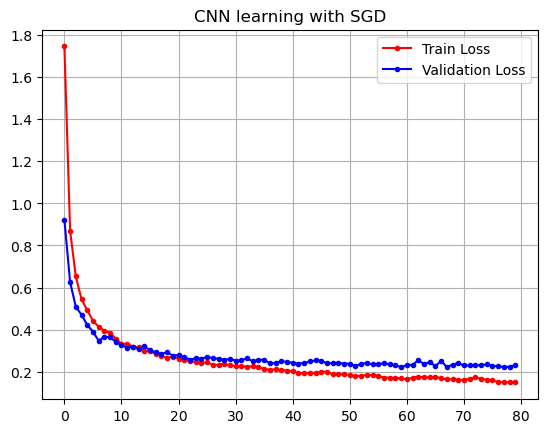

In [28]:
convNN = Sequential()
# 5x5 convolution with 2x2 stride and 32 filters
convNN.add(Conv2D(32, (3, 3), strides = (1, 1), padding='same', \
                  input_shape=(28, 28, 1), \
                  activation='relu'))

convNN.add(MaxPooling2D(pool_size=(2, 2)))

convNN.add(Conv2D(64, (3, 3), padding='same', activation='relu'))

convNN.add(MaxPooling2D(pool_size=(2, 2)))

convNN.add(Dropout(0.25))

convNN.add(Conv2D(128, (3, 3), padding='same', activation='relu'))

convNN.add(MaxPooling2D(pool_size=(2, 2)))

convNN.add(Conv2D(128, (3, 3), padding='same', activation='relu'))

convNN.add(MaxPooling2D(pool_size=(2, 2)))

convNN.add(Dropout(0.5))

convNN.add(Flatten())

convNN.add(Dense(256, activation='relu'))

convNN.add(Dropout(0.25))

convNN.add(Dense(num_classes, activation='softmax'))


batch_size = 512
epochs = 80


convNN.compile(SGD(lr = .01, momentum=0.99), loss='categorical_crossentropy', metrics=['accuracy'])

run_hist_sgd_minist = convNN.fit(data_train, target_train, batch_size=batch_size, epochs=epochs,
                          validation_data=(data_test, target_test), shuffle=True, 
                          verbose=1)



plt.plot(run_hist_sgd_minist.history["loss"], 'r', marker='.', label="Train Loss")
plt.plot(run_hist_sgd_minist.history["val_loss"], 'b', marker='.', label="Validation Loss")
plt.title("CNN learning with SGD")
plt.legend()
plt.grid()


#model accuracy
scores = convNN.evaluate(data_test, target_test, verbose=True)
print('Test accuracy:', scores[1])

In [29]:
convNN.save('convolution_neural_network91,78.h5')

Epoch 1/80
60/60 [==============================] - 26s 412ms/step - loss: 2.1554 - accuracy: 0.1886 - val_loss: 1.2224 - val_accuracy: 0.5399
Epoch 2/80
60/60 [==============================] - 25s 422ms/step - loss: 1.1903 - accuracy: 0.5307 - val_loss: 0.8550 - val_accuracy: 0.6731
Epoch 3/80
60/60 [==============================] - 25s 410ms/step - loss: 0.9060 - accuracy: 0.6442 - val_loss: 0.6869 - val_accuracy: 0.7458
Epoch 4/80
60/60 [==============================] - 25s 424ms/step - loss: 0.7444 - accuracy: 0.7148 - val_loss: 0.6177 - val_accuracy: 0.7611
Epoch 5/80
60/60 [==============================] - 25s 423ms/step - loss: 0.6354 - accuracy: 0.7576 - val_loss: 0.5353 - val_accuracy: 0.8022
Epoch 6/80
60/60 [==============================] - 25s 409ms/step - loss: 0.5779 - accuracy: 0.7820 - val_loss: 0.4914 - val_accuracy: 0.8158
Epoch 7/80
60/60 [==============================] - 25s 409ms/step - loss: 0.5309 - accuracy: 0.8044 - val_loss: 0.4543 - val_accuracy: 0.8284

Epoch 58/80
60/60 [==============================] - 25s 413ms/step - loss: 0.1869 - accuracy: 0.9319 - val_loss: 0.2445 - val_accuracy: 0.9138
Epoch 59/80
60/60 [==============================] - 24s 408ms/step - loss: 0.1818 - accuracy: 0.9338 - val_loss: 0.2324 - val_accuracy: 0.9187
Epoch 60/80
60/60 [==============================] - 24s 398ms/step - loss: 0.1816 - accuracy: 0.9339 - val_loss: 0.2416 - val_accuracy: 0.9172
Epoch 61/80
60/60 [==============================] - 25s 414ms/step - loss: 0.1763 - accuracy: 0.9357 - val_loss: 0.2333 - val_accuracy: 0.9195
Epoch 62/80
60/60 [==============================] - 27s 446ms/step - loss: 0.1728 - accuracy: 0.9372 - val_loss: 0.2383 - val_accuracy: 0.9185
Epoch 63/80
60/60 [==============================] - 26s 440ms/step - loss: 0.1707 - accuracy: 0.9376 - val_loss: 0.2404 - val_accuracy: 0.9150
Epoch 64/80
60/60 [==============================] - 24s 407ms/step - loss: 0.1736 - accuracy: 0.9375 - val_loss: 0.2429 - val_accuracy:

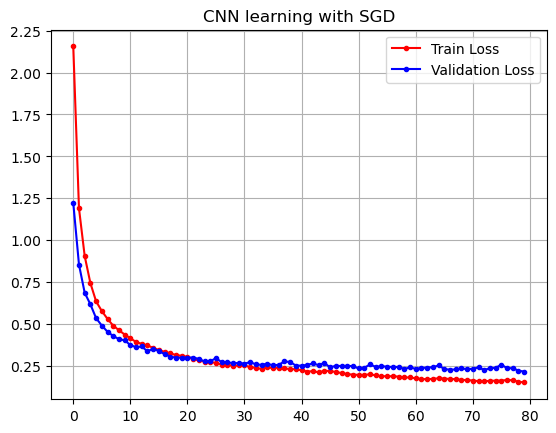

In [32]:
convNN = Sequential()
# 5x5 convolution with 2x2 stride and 32 filters
convNN.add(Conv2D(32, (3, 3), strides = (1, 1), padding='same', \
                  input_shape=(28, 28, 1), \
                  activation='relu'))

convNN.add(MaxPooling2D(pool_size=(2, 2)))

convNN.add(Conv2D(64, (3, 3), padding='same', activation='relu'))

convNN.add(MaxPooling2D(pool_size=(2, 2)))

convNN.add(Dropout(0.25))

convNN.add(Conv2D(128, (3, 3), padding='same', activation='relu'))

convNN.add(MaxPooling2D(pool_size=(2, 2)))

convNN.add(Conv2D(128, (3, 3), padding='same', activation='relu'))

convNN.add(MaxPooling2D(pool_size=(2, 2)))

convNN.add(Dropout(0.5))

convNN.add(Flatten())

convNN.add(Dense(256, activation='relu'))

convNN.add(Dropout(0.25))

convNN.add(Dense(num_classes, activation='softmax'))


batch_size = 1000
epochs = 80


convNN.compile(SGD(lr = .01, momentum=0.99), loss='categorical_crossentropy', metrics=['accuracy'])

run_hist_sgd_minist = convNN.fit(data_train, target_train, batch_size=batch_size, epochs=epochs,
                          validation_data=(data_test, target_test), shuffle=True, 
                          verbose=1)



plt.plot(run_hist_sgd_minist.history["loss"], 'r', marker='.', label="Train Loss")
plt.plot(run_hist_sgd_minist.history["val_loss"], 'b', marker='.', label="Validation Loss")
plt.title("CNN learning with SGD")
plt.legend()
plt.grid()


#model accuracy
scores = convNN.evaluate(data_test, target_test, verbose=True)
print('Test accuracy:', scores[1])

In [33]:
convNN.save('convolution_neural_network92,52.h5')

In [ ]:
from keras.models import load_model
from keras.utils import plot_model
import visualkeras

model = load_model('convolution_neural_network1.h5')

(visualkeras.layered_view(model)).save('convolution_neural_network1.png')


In [4]:
model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_52 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_52 (MaxPoolin  (None, 14, 14, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_53 (Conv2D)          (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_53 (MaxPoolin  (None, 7, 7, 64)         0         
 g2D)                                                            
                                                                 
 dropout_39 (Dropout)        (None, 7, 7, 64)          0         
                                                                 
 conv2d_54 (Conv2D)          (None, 7, 7, 128)       

1/1 [==============================] - 0s 24ms/step
Bag


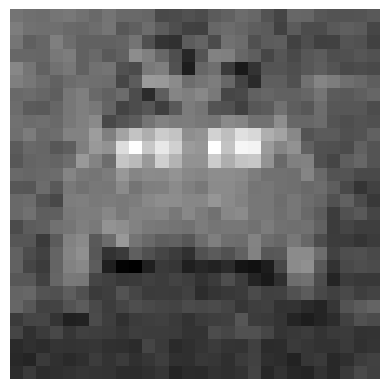

In [48]:
from tensorflow.keras.preprocessing import image
from PIL import Image
import numpy as np
#from sklearn.preprocessing import LabelEncoder

#label_encoder = LabelEncoder()
#encoded_labels = label_encoder.fit_transform(labels)
#num_classes = len(label_encoder.classes_)

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal',      'Shirt',   'Sneaker',  'Bag',   'Ankle boot']

image_path = './test/hoodie.jpg'
image = Image.open(image_path).convert('L')
image = image.resize((28, 28))

plt.imshow(image, cmap='gray'), plt.axis('off'), plt.grid(False)
image.close

image_array = np.array(image) / 255.0
image_input = image_array.reshape(1, 28, 28, 1)


predictions = model.predict(image_input)
predicted_label = np.argmax(predictions[0])

print(class_names[predicted_label])



1/1 [==============================] - 0s 25ms/step
Bag


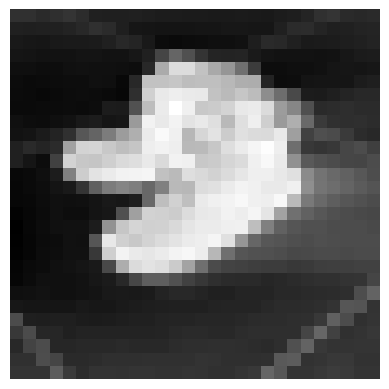

In [31]:
image_path = './test/boots.jpg'
image = Image.open(image_path).convert('L')
image = image.resize((28, 28))




#image_array = np.array(image) / 255.0
image_array = np.invert(np.array(image)) / 255.0
image_input = image_array.reshape(1, 28, 28, 1)
#image_input = ((image_array)).reshape(1, 28, 28, 1)

plt.imshow(image_array, cmap='gray'), plt.axis('off'), plt.grid(False)
image.close

predictions = model.predict(image_input)
predicted_label = np.argmax(predictions[0])

print(class_names[predicted_label])

1/1 [==============================] - 0s 25ms/step
T-shirt/top


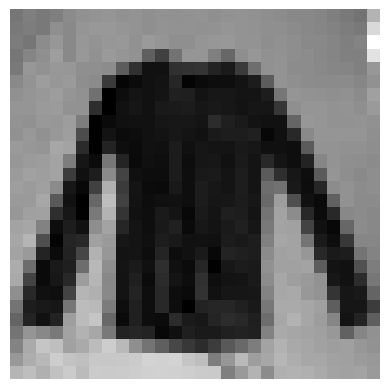

In [37]:
image_path = './test/ls.jpg'
image = Image.open(image_path).convert('L')
image = image.resize((28, 28))

plt.imshow(image, cmap='gray'), plt.axis('off'), plt.grid(False)
image.close

image_array = np.array(image) / 255.0
image_input = image_array.reshape(1, 28, 28, 1)


predictions = model.predict(image_input)
predicted_label = np.argmax(predictions[0])

print(class_names[predicted_label])

1/1 [==============================] - 0s 26ms/step
Pullover


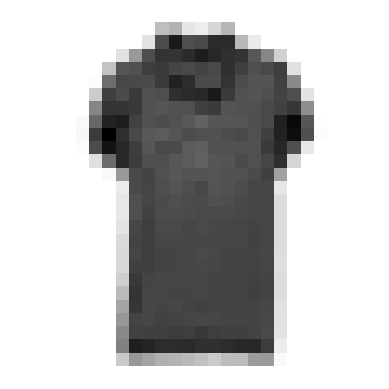

In [45]:
image_path = './test/polo.jpg'
image = Image.open(image_path).convert('L')
image = image.resize((28, 28))

plt.imshow(image, cmap='gray'), plt.axis('off'), plt.grid(False)
image.close

image_array = np.array(image) / 255.0
image_input = image_array.reshape(1, 28, 28, 1)


predictions = model.predict(image_input)
predicted_label = np.argmax(predictions[0])

print(class_names[predicted_label])

1/1 [==============================] - 0s 24ms/step
T-shirt/top


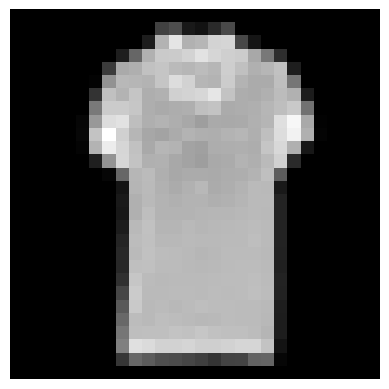

In [40]:
image_path = './test/polo.jpg'
image = Image.open(image_path).convert('L')
image = image.resize((28, 28))

image_array = np.invert(np.array(image)) / 255.0
image_input = image_array.reshape(1, 28, 28, 1)

plt.imshow(image_array, cmap='gray'), plt.axis('off'), plt.grid(False)
image.close


predictions = model.predict(image_input)
predicted_label = np.argmax(predictions[0])

print(class_names[predicted_label])

1/1 [==============================] - 0s 25ms/step
Trouser


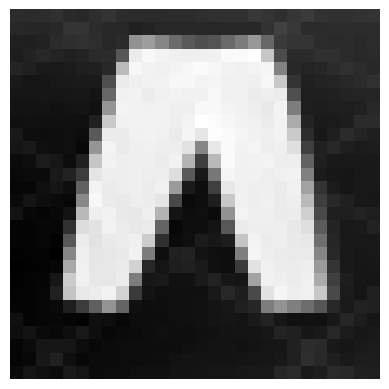

In [42]:
image_path = './test/pants.jpg'
image = Image.open(image_path).convert('L')
image = image.resize((28, 28))

image_array = np.invert(np.array(image)) / 255.0
image_input = image_array.reshape(1, 28, 28, 1)

plt.imshow(image_array, cmap='gray'), plt.axis('off'), plt.grid(False)
image.close


predictions = model.predict(image_input)
predicted_label = np.argmax(predictions[0])

print(class_names[predicted_label])

1/1 [==============================] - 0s 24ms/step
T-shirt/top


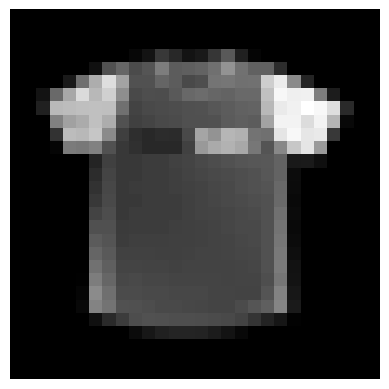

In [44]:
image_path = './test/t-shirt.jpg'
image = Image.open(image_path).convert('L')
image = image.resize((28, 28))

image_array = np.invert(np.array(image)) / 255.0
image_input = image_array.reshape(1, 28, 28, 1)

plt.imshow(image_array, cmap='gray'), plt.axis('off'), plt.grid(False)
image.close


predictions = model.predict(image_input)
predicted_label = np.argmax(predictions[0])

print(class_names[predicted_label])

313/313 [==============================] - 2s 7ms/step


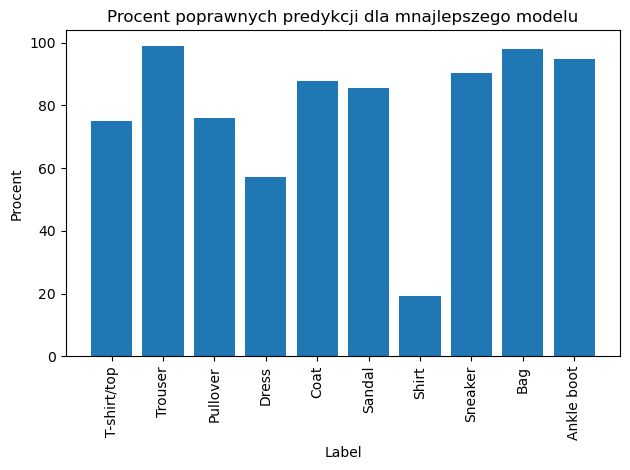

In [60]:
from keras.datasets import fashion_mnist
(data_train, target_train), (data_test, target_test) = fashion_mnist.load_data()


y_pred = model.predict(data_test)
y_pred_labels = np.argmax(y_pred, axis=1)

correct_predictions = np.equal(y_pred_labels, target_test)
correct_per_label = np.bincount(target_test[correct_predictions])

total_per_label = np.bincount(target_test)

percent_correct_per_label = (correct_per_label / total_per_label) * 100

labels = class_names
x = np.arange(len(labels))


plt.bar(x, percent_correct_per_label)
plt.xlabel('Label')
plt.ylabel('Procent')
plt.xticks(x, labels, rotation='vertical')
plt.title('Procent poprawnych predykcji dla mnajlepszego modelu')
plt.tight_layout()
plt.show()